# Scraping data from Understat

In [32]:
import pandas as pd 
import requests
import numpy as np 
import json 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from mplsoccer import Pitch


In [2]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match number you wish to collect data from: '))
url = base_url + match

Please enter the match number you wish to collect data from: 14800


In [3]:
url

'https://understat.com/match/14800'

In [4]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')
scripts = soup.find_all('script')

In [17]:
print(scripts[2].string)


	var rostersData	= JSON.parse('\x7B\x22h\x22\x3A\x7B\x22472291\x22\x3A\x7B\x22id\x22\x3A\x22472291\x22,\x22goals\x22\x3A\x220\x22,\x22own_goals\x22\x3A\x220\x22,\x22shots\x22\x3A\x220\x22,\x22xG\x22\x3A\x220\x22,\x22time\x22\x3A\x2290\x22,\x22player_id\x22\x3A\x22546\x22,\x22team_id\x22\x3A\x2289\x22,\x22position\x22\x3A\x22GK\x22,\x22player\x22\x3A\x22David\x20de\x20Gea\x22,\x22h_a\x22\x3A\x22h\x22,\x22yellow_card\x22\x3A\x220\x22,\x22red_card\x22\x3A\x220\x22,\x22roster_in\x22\x3A\x220\x22,\x22roster_out\x22\x3A\x220\x22,\x22key_passes\x22\x3A\x220\x22,\x22assists\x22\x3A\x220\x22,\x22xA\x22\x3A\x220\x22,\x22xGChain\x22\x3A\x220.04619088023900986\x22,\x22xGBuildup\x22\x3A\x220.04619088023900986\x22,\x22positionOrder\x22\x3A\x221\x22\x7D,\x22472292\x22\x3A\x7B\x22id\x22\x3A\x22472292\x22,\x22goals\x22\x3A\x220\x22,\x22own_goals\x22\x3A\x220\x22,\x22shots\x22\x3A\x220\x22,\x22xG\x22\x3A\x220\x22,\x22time\x22\x3A\x2290\x22,\x22player_id\x22\x3A\x225584\x22,\x22team_id\x22\x3A\x2289\x22

In [5]:
strings = scripts[1].string

In [7]:
index_start = strings.index("('")+2
index_end = strings.index("')")

json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

In [8]:
data = json.loads(json_data)

In [9]:
df_home = data['h']

In [18]:
df_home

[{'id': '423105',
  'minute': '5',
  'result': 'MissedShots',
  'X': '0.9209999847412109',
  'Y': '0.5179999923706055',
  'xG': '0.1332176774740219',
  'player': 'Paul Pogba',
  'h_a': 'h',
  'player_id': '1740',
  'situation': 'OpenPlay',
  'season': '2020',
  'shotType': 'Head',
  'match_id': '14800',
  'h_team': 'Manchester United',
  'a_team': 'Fulham',
  'h_goals': '1',
  'a_goals': '1',
  'date': '2021-05-18 17:00:00',
  'player_assisted': 'Aaron Wan-Bissaka',
  'lastAction': 'Cross'},
 {'id': '423106',
  'minute': '14',
  'result': 'Goal',
  'X': '0.6719999694824219',
  'Y': '0.33599998474121096',
  'xG': '0.014647945761680603',
  'player': 'Edinson Cavani',
  'h_a': 'h',
  'player_id': '3294',
  'situation': 'OpenPlay',
  'season': '2020',
  'shotType': 'RightFoot',
  'match_id': '14800',
  'h_team': 'Manchester United',
  'a_team': 'Fulham',
  'h_goals': '1',
  'a_goals': '1',
  'date': '2021-05-18 17:00:00',
  'player_assisted': 'Bruno Fernandes',
  'lastAction': 'Pass'},
 {'

In [10]:
df_away = data['a']

In [22]:
X =[]
y =[]
xG =[]
team = []

for index in range(len(df_home)):
    for key in df_home[index]:
        if key =='X':
            X.append(df_home[index][key])
        if key =='Y':
            y.append(df_home[index][key])
        if key=='xG':
            xG.append(df_home[index][key])
        if key=='h_team':
            team.append(df_home[index][key])
for index in range(len(df_away)):
    for key in df_away[index]:
        if key =='X':
            X.append(df_away[index][key])
        if key =='Y':
            y.append(df_away[index][key])
        if key=='xG':
            xG.append(df_away[index][key])
        if key=='a_team':
            team.append(df_away[index][key])

In [25]:
col_names = ['X', 'Y', 'xG', 'team']
df = pd.DataFrame([X,y,xG,team], index = col_names)

In [35]:
df = df.T

In [36]:
df

,X,Y,xG,team
0,0.9209999847412109,0.5179999923706055,0.1332176774740219,Manchester United
1,0.6719999694824219,0.33599998474121096,0.014647945761680603,Manchester United
2,0.9380000305175781,0.4540000152587891,0.1454290896654129,Manchester United
3,0.7619999694824219,0.43,0.02900708094239235,Manchester United
4,0.7430000305175781,0.4540000152587891,0.016029518097639084,Manchester United
5,0.769000015258789,0.6659999847412109,0.02605387568473816,Manchester United
6,0.7330000305175781,0.4809999847412109,0.05328523367643356,Manchester United
7,0.7619999694824219,0.40900001525878904,0.03306923434138298,Manchester United
8,0.784000015258789,0.34200000762939453,0.031542934477329254,Manchester United
9,0.919000015258789,0.8080000305175781,0.06730871647596359,Manchester United


In [ ]:
df['X_scaled'] = d['X']*120
df['Y_scaled'] 

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U18'), dtype('<U18')) -> dtype('<U18')

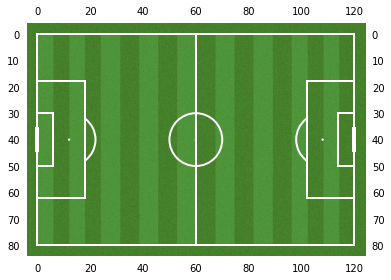

In [48]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, label = True)
fig, ax = pitch.draw()
pitch = pitch.arrows(X[0], y[0],X[1], y[1], ax=ax)
#pitch.annotate(text='center', xytext=(50, 50), xy=(60, 40), ha='center', va='center', ax=ax, arrowprops=dict(facecolor='black'))
plt.show()